In [13]:
# librariess importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import polar as pl
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
# data loading
df = pd.read_csv('/content/sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


* Identify Numerical Columns

In [3]:
# Identify Numerical Columns Check the data types to determine which columns are numerical.
numerical_cloumns = df.select_dtypes(include=['float64', 'int64'])
numerical_cloumns

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


* Calculate Basic Statistics

In [7]:
!pip install polar

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 11.5 MB/s eta 0:00:00
  Created wheel for polar: filename=polar-0.0.127-py3-none-any.whl size=10036 sha256=13875d8b23003a346c9fe40eff109ec11bfc20e5234638cd80868b0f8918cef4
  Stored in directory: /root/.cache/pip/wheels/0f/ef/e5/21cee4ed5fd35d5a77e95b1a34e2006c654e0f6f810781142c
Successfully built polar


In [12]:
# creating tabular dataframe
# polar library just works like pandas , but it give the data in table
import polar as pl

In [11]:

# Assume statistics dictionary
statistics = {}
for col in numerical_cloumns:
    statistics[col] = {
        'mean': df[col].mean(),
        'median': df[col].median(),
        'mode': df[col].mode()[0],
        'std_dev': df[col].std()
    }

# Convert the dictionary to a list of rows for Polars DataFrame
data = []
for col, stats in statistics.items():
    data.append((col, stats['mean'], stats['median'], stats['mode'], stats['std_dev']))

# Define the column names and create a Polars DataFrame
statistics_df = pl.DataFrame(data, schema=["column", "mean", "median", "mode", "std_dev"])

# Print the statistics in a tabular format
print(statistics_df)


shape: (6, 5)
┌───────────────────┬──────────────┬─────────────┬────────────┬──────────────┐
│ column            ┆ mean         ┆ median      ┆ mode       ┆ std_dev      │
│ ---               ┆ ---          ┆ ---         ┆ ---        ┆ ---          │
│ str               ┆ f64          ┆ f64         ┆ f64        ┆ f64          │
╞═══════════════════╪══════════════╪═════════════╪════════════╪══════════════╡
│ Volume            ┆ 5.066667     ┆ 4.0         ┆ 3.0        ┆ 4.231602     │
│ Avg Price         ┆ 10453.433333 ┆ 1450.0      ┆ 400.0      ┆ 18079.90484  │
│ Total Sales Value ┆ 33812.835556 ┆ 5700.0      ┆ 24300.0    ┆ 50535.074173 │
│ Discount Rate (%) ┆ 15.155242    ┆ 16.577766   ┆ 5.007822   ┆ 4.220602     │
│ Discount Amount   ┆ 3346.499424  ┆ 988.933733  ┆ 69.177942  ┆ 4509.902963  │
│ Net Sales Value   ┆ 30466.336131 ┆ 4677.788059 ┆ 326.974801 ┆ 46358.656624 │
└───────────────────┴──────────────┴─────────────┴────────────┴──────────────┘


Interpretation: The mean provides the average value, the median offers insight into the central tendency without the influence of outliers, while the mode shows the most frequent value. The standard deviation tells us about the spread of the data.

# Data Visualization

* Histograms: Visualize the distribution of each numerical column.

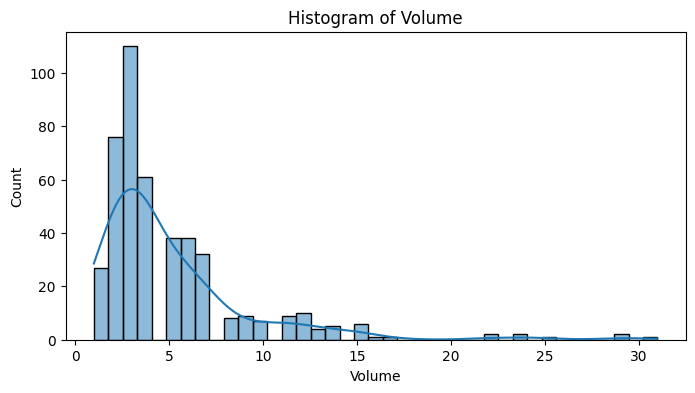

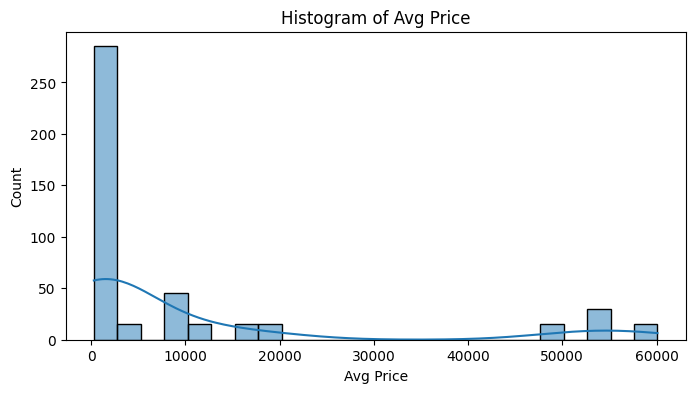

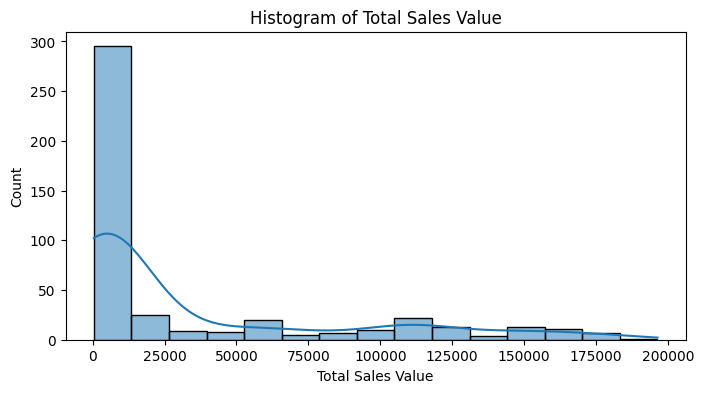

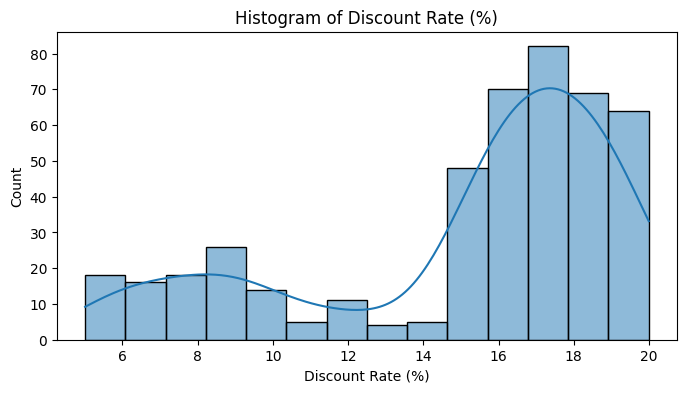

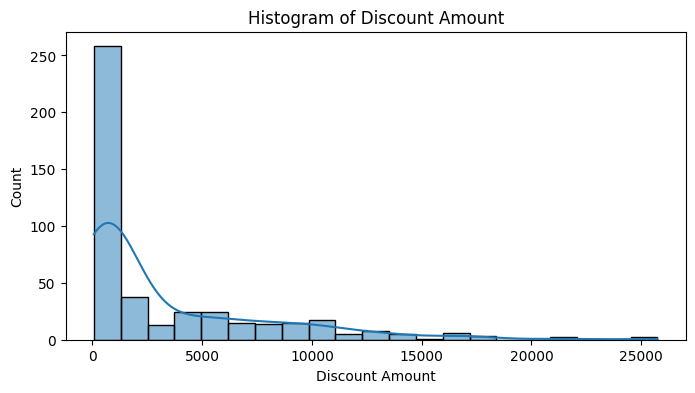

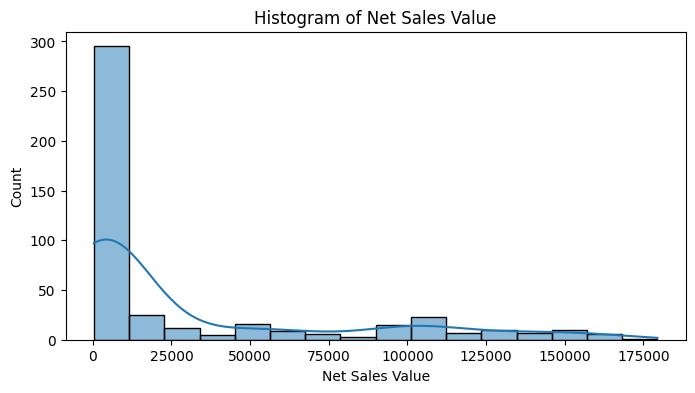

In [14]:
histograms = {}
for col in numerical_cloumns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, kde = True)
    plt.title(f'Histogram of {col}')
    plt.show()

* Boxplots: Identify outliers and spread.

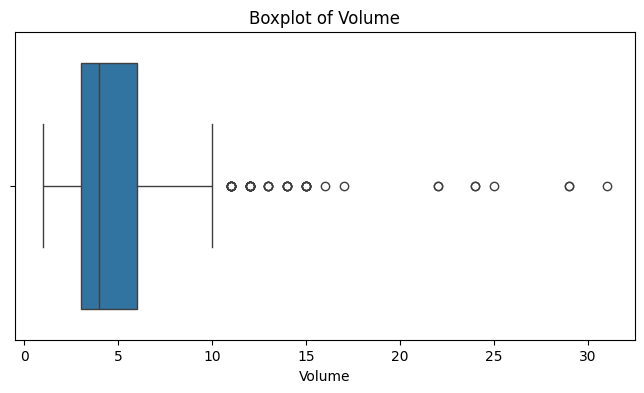

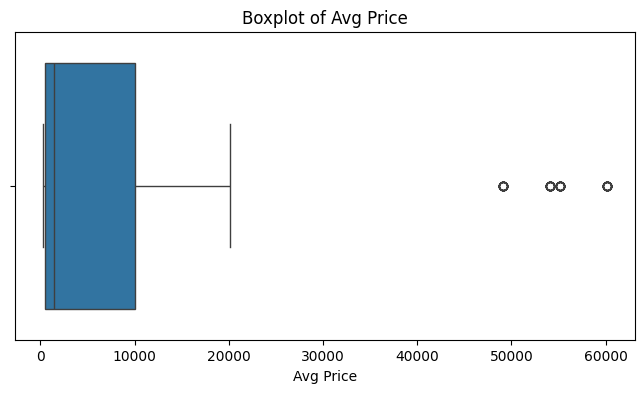

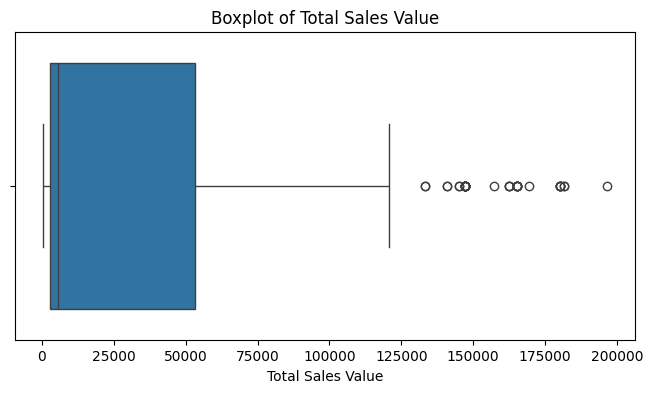

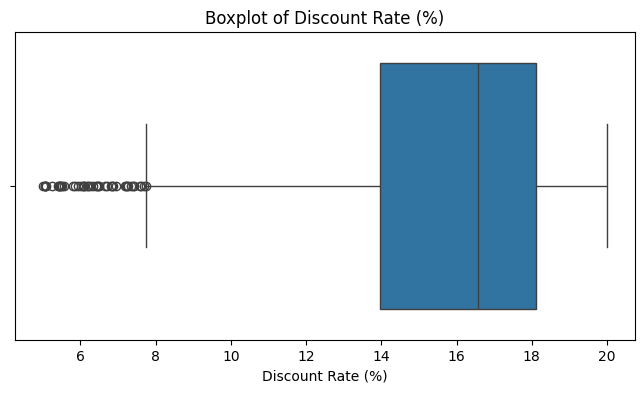

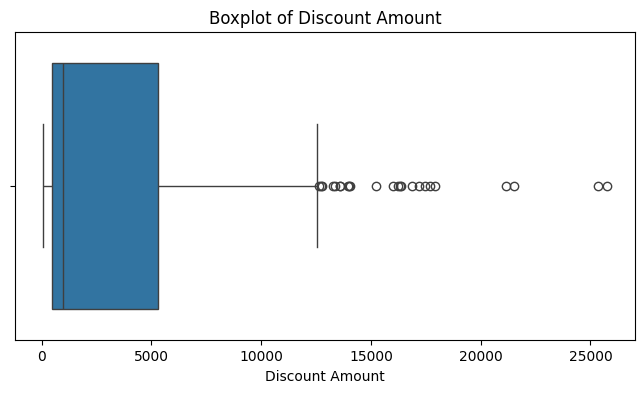

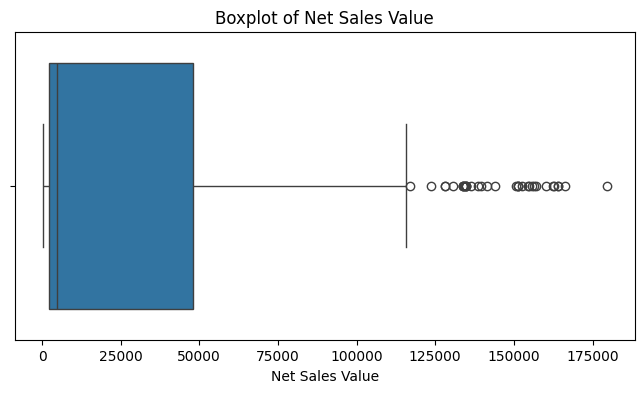

In [15]:
boxplots = {}
for col in numerical_cloumns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

* Bar Chart Analysis for Categorical Columns: Identify and plot categorical columns.

In [20]:
# categorical coumns
categorical_columns = df.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

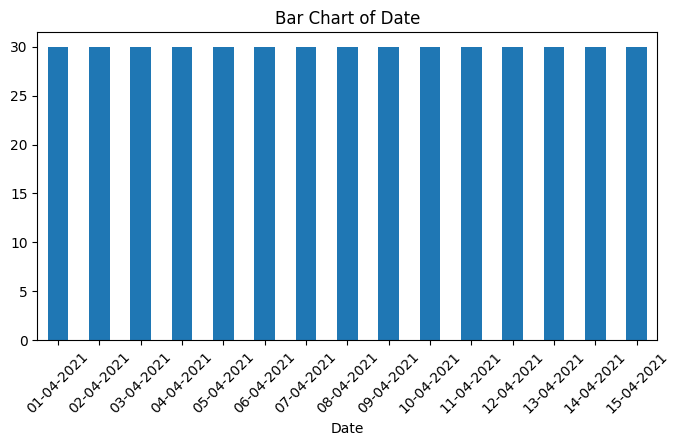

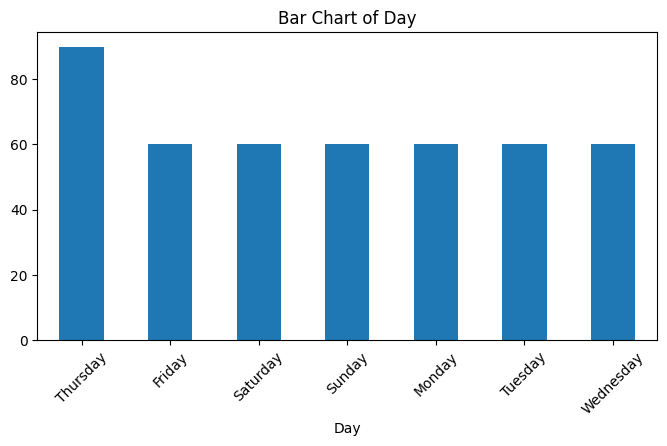

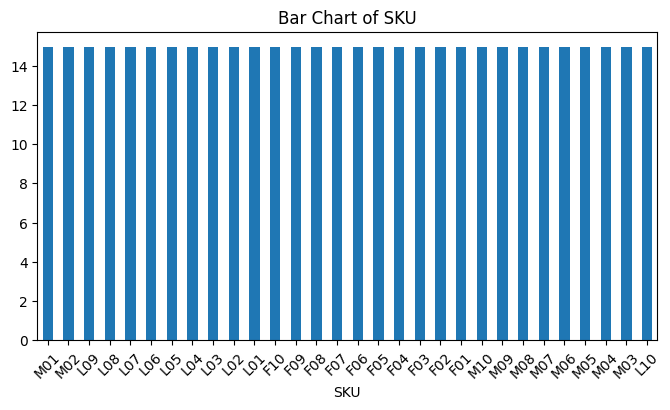

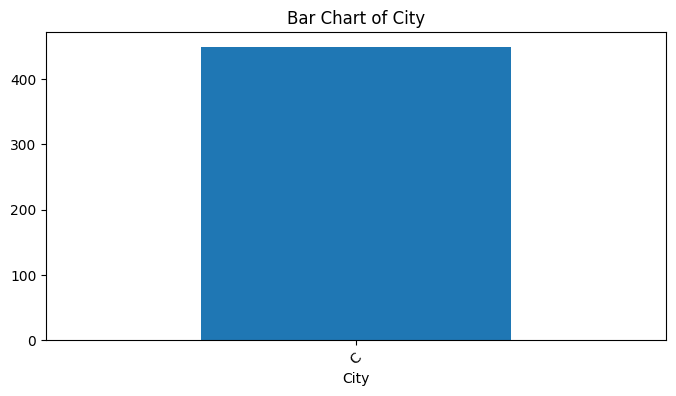

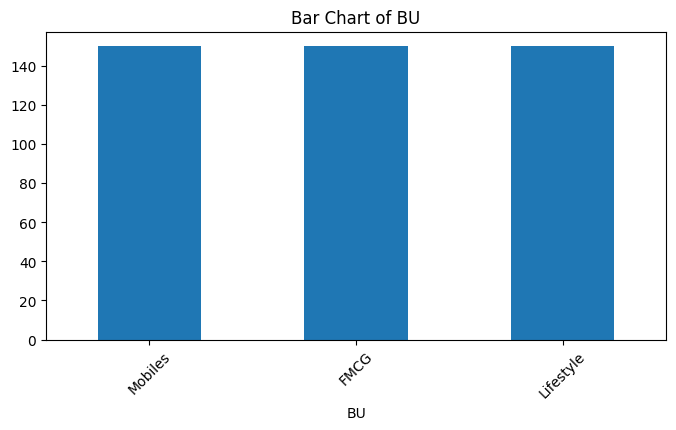

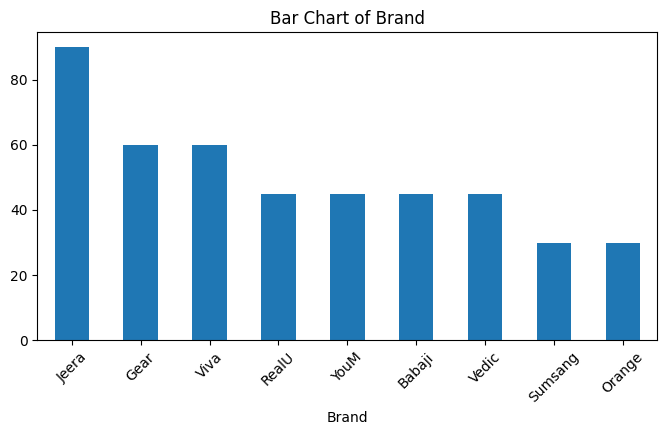

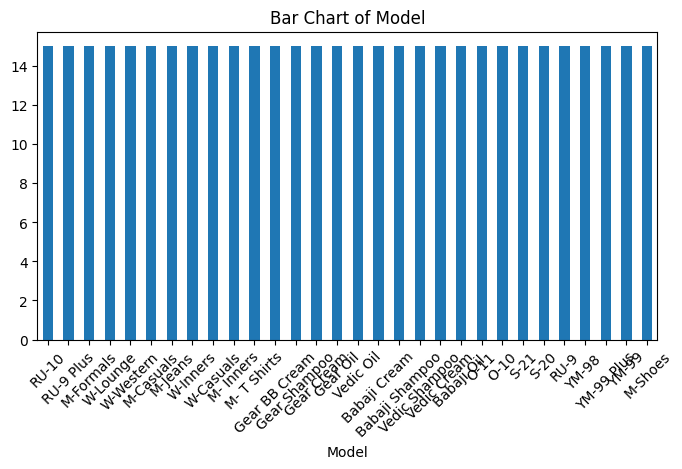

In [23]:
# Bar Chart Analysis
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()


# Standardization of Numerical Variables

* **Explanation**: Standardization transforms data to have a mean of zero and a standard deviation of one (z-score normalization), enabling models to interpret the features more uniformly.

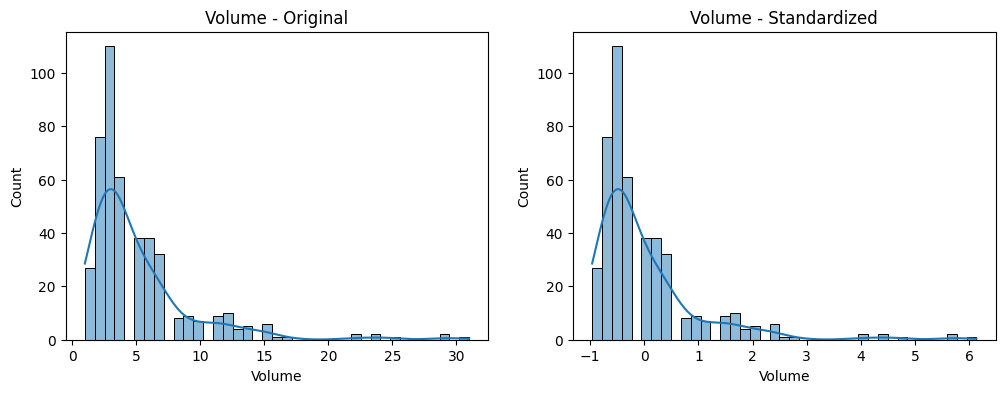

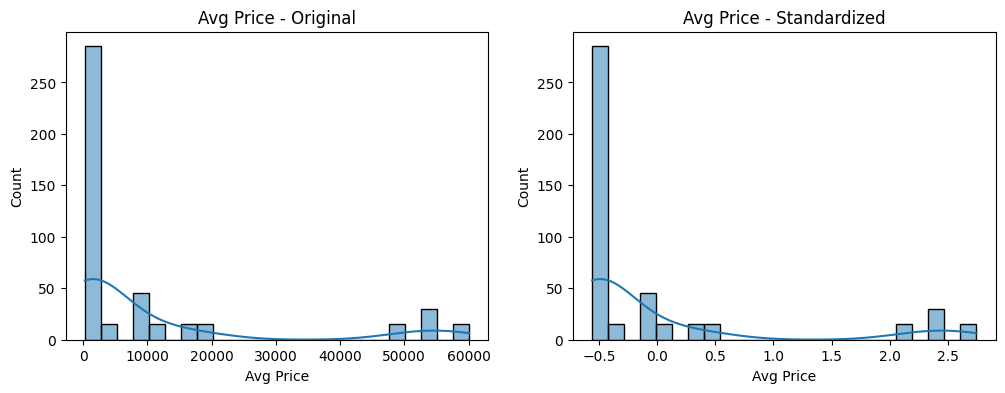

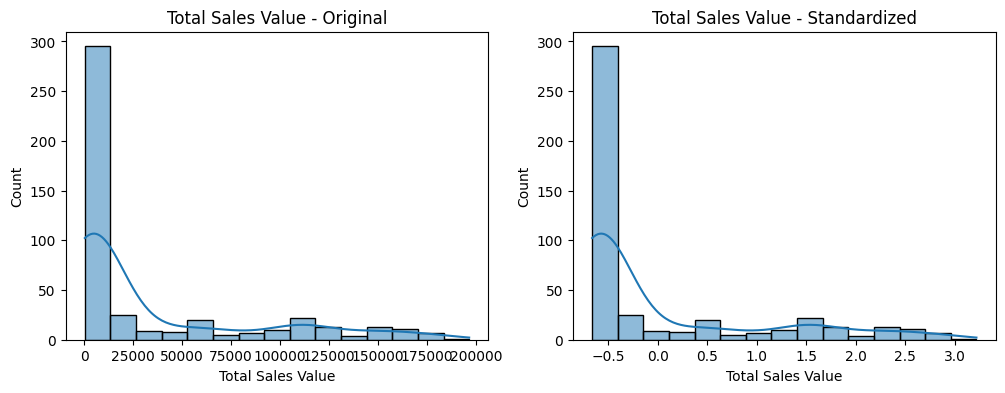

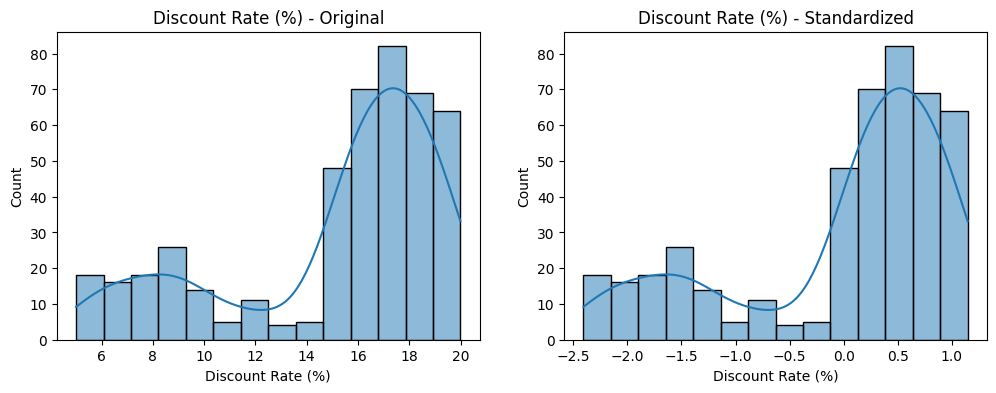

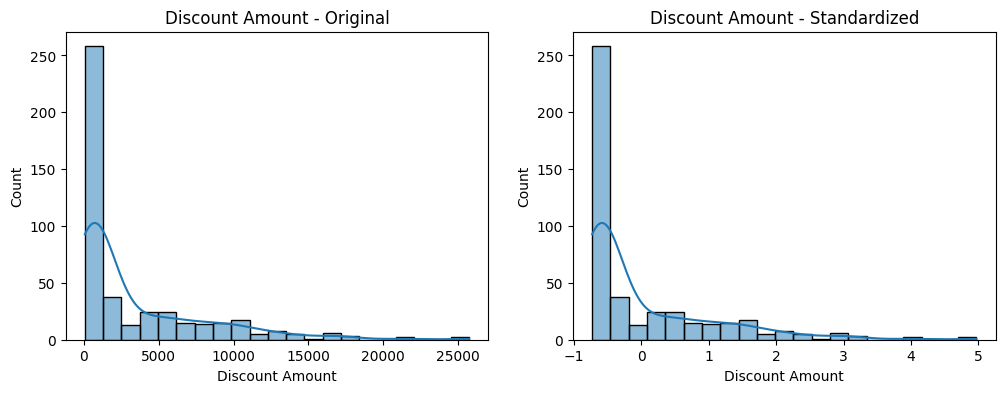

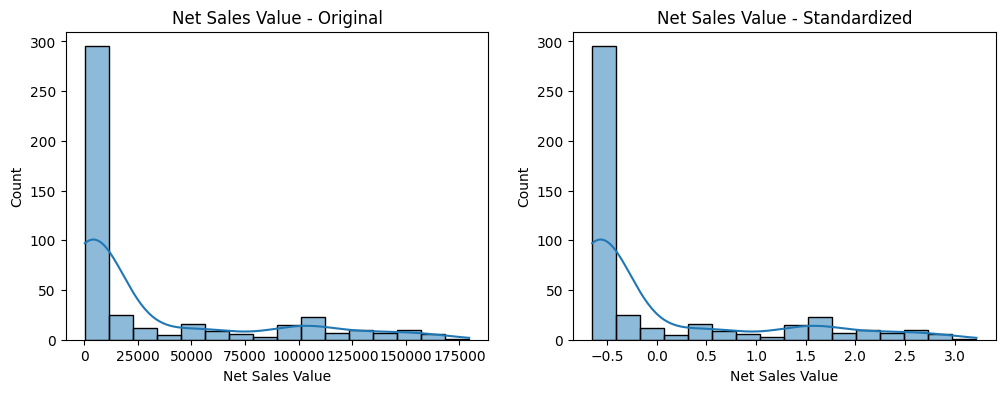

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()

# Get numerical column names as a list
numerical_columns = df.select_dtypes(include=['number']).columns

df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Before and after comparison
for col in numerical_columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} - Original')

    plt.subplot(1, 2, 2)
    sns.histplot(df_standardized[col], kde=True)
    plt.title(f'{col} - Standardized')
    plt.show()

# Conversion of Categorical Data into Dummy Variables
* Converting categorical variables into dummy variables (one-hot encoding) allows categorical data to be used in machine learning models that require numerical input.

In [32]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)
display(df_encoded.head())


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Conclusion
* **Key Findings**: The dataset's numerical columns show varying ranges and distributions, some of which may benefit from standardization to improve analytical consistency.

  #######  **Descriptive Analytics:** #########

* The mean, median, mode, and standard deviation for numerical columns provide insight into the central tendency and dispersion of the data.
* For instance, the average sales and discounts offered can be understood from these statistics.

* **Volume**:
     * Mean: 5.07
     * Median: 4.00
     * Mode: 3.00
     * Standard Deviation: 4.23
* **Avg Price**:
     * Mean: 10,453.43
     * Median: 1,450.00
     * Mode: 400.00
     * Standard Deviation: 18,079.90
* **Total Sales Value**:
     * Mean: 33,812.84
     * Median: 5,700.00
     * Mode: 24,300.00
     * Standard Deviation: 50,535.07
* **Discount Rate (%):**
     * Mean: 15.16%
     * Median: 16.58%
     * Mode: 5.01%
     * Standard Deviation: 4.22%
* **Discount Amount**:
     *  Mean: 3,346.50
     *  Median: 988.93
     *  Mode: 69.18
     *   Standard Deviation: 4,509.90
* **Net Sales Value:**
     * Mean: 30,466.34
     * Median: 4,677.79
     * Mode: 326.97
     * Standard Deviation: 46,358.66

* **Visual Insights**: Histograms and boxplots reveal distribution shapes and potential outliers, while bar charts highlight the distribution of categorical data.
* **Data Preprocessing Importance**: Standardization and one-hot encoding are vital for preparing data for machine learning, ensuring features have the appropriate scale and format for model training.